In [1]:
##Configure tweepy for use
from config import api_key, api_secret, bearer_token, access_token, access_secret
import tweepy
import time
#This sets the authorization for tweepy, seems to work
#Have to set auth every time. 
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [2]:
for status in tweepy.Cursor(api.search, q = 'public transit exclude:retweets', tweet_mode = 'extended').items(1):
      print(status)

Status(_api=<tweepy.api.API object at 0x00000122863C4DC8>, _json={'created_at': 'Thu Nov 19 14:00:48 +0000 2020', 'id': 1329424388203155457, 'id_str': '1329424388203155457', 'full_text': "@TomThum55381215 @carolinacurl @thehill People who don't drive/ own cars and take Ubers and public Transit to work want us to pay a mileage tax and tax us for heating our homes with wood. Yes, their policies would cripple rural Americans who often drive 30 to 50 miles a day to work and back.", 'truncated': False, 'display_text_range': [40, 292], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TomThum55381215', 'name': 'B_News', 'id': 625680389, 'id_str': '625680389', 'indices': [0, 16]}, {'screen_name': 'carolinacurl', 'name': 'CarolinaBells', 'id': 847111485599989761, 'id_str': '847111485599989761', 'indices': [17, 30]}, {'screen_name': 'thehill', 'name': 'The Hill', 'id': 1917731, 'id_str': '1917731', 'indices': [31, 39]}], 'urls': []}, 'metadata': {'iso_language_code'

In [3]:
places = api.geo_search(query="USA", granularity="country")
place_id = places[0].id

In [4]:
loop = 0
statuses = []

#       statuses.append(status.full_text)
    
for status in tweepy.Cursor(api.search, q = 'public transit exclude:retweets place:%s' % place_id, tweet_mode = 'extended', count = 1000).items():
    statuses.append(status.full_text)
    print(f'Loop {loop} complete')
    time.sleep(1.5)
    loop +=1

statuses


Loop 0 complete
Loop 1 complete
Loop 2 complete
Loop 3 complete
Loop 4 complete
Loop 5 complete
Loop 6 complete
Loop 7 complete
Loop 8 complete
Loop 9 complete
Loop 10 complete
Loop 11 complete
Loop 12 complete
Loop 13 complete
Loop 14 complete
Loop 15 complete
Loop 16 complete
Loop 17 complete
Loop 18 complete
Loop 19 complete
Loop 20 complete
Loop 21 complete
Loop 22 complete
Loop 23 complete
Loop 24 complete
Loop 25 complete
Loop 26 complete
Loop 27 complete
Loop 28 complete
Loop 29 complete
Loop 30 complete
Loop 31 complete
Loop 32 complete
Loop 33 complete
Loop 34 complete
Loop 35 complete
Loop 36 complete
Loop 37 complete
Loop 38 complete
Loop 39 complete
Loop 40 complete
Loop 41 complete
Loop 42 complete
Loop 43 complete
Loop 44 complete
Loop 45 complete
Loop 46 complete
Loop 47 complete
Loop 48 complete
Loop 49 complete
Loop 50 complete
Loop 51 complete
Loop 52 complete
Loop 53 complete
Loop 54 complete
Loop 55 complete
Loop 56 complete
Loop 57 complete
Loop 58 complete
Loop 59

["It really sucks when u don't have a car and not only are u walking/ biking and using public transit, u can't hardly get a ride from nobody, AND u have to watch everybody get their cars and driving it. Or when u don't make enough money to afford one.",
 'This is not going to be a popular take, but I would also choose the Banc:\n• Centrally located.\n• Easily accessible by public transit.\n• Smaller stadium means fewer empty seats. https://t.co/5CJyDPg5Tc',
 'Having the best public health officer in the country can totally make up for having no funded local transit advocacy &amp; a 23 y/o running transit advocacy. \n\nWhen you all are not getting passed up by VTA in a few weeks, please thank Dr. Cody for saving us :)',
 'I know I shouldn’t have high expectations for public transit but... sir on the route 1 bus in Corvallis on the Witham stop. Please. You don’t need to bathe in Axe, you’re 30.',
 "This year, I went from doing transit advocacy for fun to being responsible for saving tran

In [5]:
#Begin cleaning national tweets 
#Make everything one big string
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [6]:
#Combine all tweets into one big ass list 
tweets_combined = combine_text(statuses)
tweets_combined

'It really sucks when u don\'t have a car and not only are u walking/ biking and using public transit, u can\'t hardly get a ride from nobody, AND u have to watch everybody get their cars and driving it. Or when u don\'t make enough money to afford one. This is not going to be a popular take, but I would also choose the Banc:\n• Centrally located.\n• Easily accessible by public transit.\n• Smaller stadium means fewer empty seats. https://t.co/5CJyDPg5Tc Having the best public health officer in the country can totally make up for having no funded local transit advocacy &amp; a 23 y/o running transit advocacy. \n\nWhen you all are not getting passed up by VTA in a few weeks, please thank Dr. Cody for saving us :) I know I shouldn’t have high expectations for public transit but... sir on the route 1 bus in Corvallis on the Witham stop. Please. You don’t need to bathe in Axe, you’re 30. This year, I went from doing transit advocacy for fun to being responsible for saving transit for 120k+ 

In [7]:
import re
import string
#Clean big ass string
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('@[^\s]+','',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text

tweets_combined_clean = clean_text_round1(tweets_combined)
tweets_combined_clean

'it really sucks when u dont have a car and not only are u walking biking and using public transit u cant hardly get a ride from nobody and u have to watch everybody get their cars and driving it or when u dont make enough money to afford one this is not going to be a popular take but i would also choose the banc• centrally located• easily accessible by public transit• smaller stadium means fewer empty seats  having the best public health officer in the country can totally make up for having no funded local transit advocacy amp a  yo running transit advocacy when you all are not getting passed up by vta in a few weeks please thank dr cody for saving us  i know i shouldnt have high expectations for public transit but sir on the route  bus in corvallis on the witham stop please you dont need to bathe in axe youre  this year i went from doing transit advocacy for fun to being responsible for saving transit for  people overnight its been really hard amp stressful amp scary but thanks to sc

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#Tokenize list
#Tokenize df
tweets_combined_clean = word_tokenize(tweets_combined_clean)
tweets_combined_clean

['it',
 'really',
 'sucks',
 'when',
 'u',
 'dont',
 'have',
 'a',
 'car',
 'and',
 'not',
 'only',
 'are',
 'u',
 'walking',
 'biking',
 'and',
 'using',
 'public',
 'transit',
 'u',
 'cant',
 'hardly',
 'get',
 'a',
 'ride',
 'from',
 'nobody',
 'and',
 'u',
 'have',
 'to',
 'watch',
 'everybody',
 'get',
 'their',
 'cars',
 'and',
 'driving',
 'it',
 'or',
 'when',
 'u',
 'dont',
 'make',
 'enough',
 'money',
 'to',
 'afford',
 'one',
 'this',
 'is',
 'not',
 'going',
 'to',
 'be',
 'a',
 'popular',
 'take',
 'but',
 'i',
 'would',
 'also',
 'choose',
 'the',
 'banc•',
 'centrally',
 'located•',
 'easily',
 'accessible',
 'by',
 'public',
 'transit•',
 'smaller',
 'stadium',
 'means',
 'fewer',
 'empty',
 'seats',
 'having',
 'the',
 'best',
 'public',
 'health',
 'officer',
 'in',
 'the',
 'country',
 'can',
 'totally',
 'make',
 'up',
 'for',
 'having',
 'no',
 'funded',
 'local',
 'transit',
 'advocacy',
 'amp',
 'a',
 'yo',
 'running',
 'transit',
 'advocacy',
 'when',
 'you',
 

In [10]:
#Take out stop words 
stop_words = set(stopwords.words('english')) 
stop = lambda x: [w for w in x if not w in stop_words] 

In [11]:
tweets_combined_clean = [w for w in tweets_combined_clean if not w in stop_words]
tweets_combined_clean

['really',
 'sucks',
 'u',
 'dont',
 'car',
 'u',
 'walking',
 'biking',
 'using',
 'public',
 'transit',
 'u',
 'cant',
 'hardly',
 'get',
 'ride',
 'nobody',
 'u',
 'watch',
 'everybody',
 'get',
 'cars',
 'driving',
 'u',
 'dont',
 'make',
 'enough',
 'money',
 'afford',
 'one',
 'going',
 'popular',
 'take',
 'would',
 'also',
 'choose',
 'banc•',
 'centrally',
 'located•',
 'easily',
 'accessible',
 'public',
 'transit•',
 'smaller',
 'stadium',
 'means',
 'fewer',
 'empty',
 'seats',
 'best',
 'public',
 'health',
 'officer',
 'country',
 'totally',
 'make',
 'funded',
 'local',
 'transit',
 'advocacy',
 'amp',
 'yo',
 'running',
 'transit',
 'advocacy',
 'getting',
 'passed',
 'vta',
 'weeks',
 'please',
 'thank',
 'dr',
 'cody',
 'saving',
 'us',
 'know',
 'shouldnt',
 'high',
 'expectations',
 'public',
 'transit',
 'sir',
 'route',
 'bus',
 'corvallis',
 'witham',
 'stop',
 'please',
 'dont',
 'need',
 'bathe',
 'axe',
 'youre',
 'year',
 'went',
 'transit',
 'advocacy',
 'fu

In [12]:
#Turn it into a dtm
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
tweets_cv = cv.fit_transform(tweets_combined_clean)
tweets_cv

<1582x822 sparse matrix of type '<class 'numpy.int64'>'
	with 1426 stored elements in Compressed Sparse Row format>

In [13]:
import pandas as pd
tweets_dtm = pd.DataFrame(tweets_cv.toarray(), columns = cv.get_feature_names())
tweets_dtm

,abandon,ability,able,abolition,access,accessibility,accessible,accommodations,act,admittedly,...,workers,working,works,yall,year,years,yo,youre,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Create lambda fxns for polarity and subjectivity
from textblob import TextBlob

final_list = combine_text(tweets_combined_clean)
pol = TextBlob(final_list)
nationwide_polarity = pol.sentiment.polarity
nationwide_subjectivity = pol.sentiment.subjectivity

nationwide_polarity

0.07255795532969449

In [15]:
d = {'category': ['polarity', 'subjectivity'], 'value': [nationwide_polarity, nationwide_subjectivity]}
df = pd.DataFrame(data=d)
df

,category,value
0,polarity,0.072558
1,subjectivity,0.365935


In [16]:
df.to_csv('nationwide_sentiment.csv')

In [19]:
#Combine tweets_combined_clean into one big string for wordcloud
tweets = combine_text(tweets_combined_clean)
tweets

'really sucks u dont car u walking biking using public transit u cant hardly get ride nobody u watch everybody get cars driving u dont make enough money afford one going popular take would also choose banc• centrally located• easily accessible public transit• smaller stadium means fewer empty seats best public health officer country totally make funded local transit advocacy amp yo running transit advocacy getting passed vta weeks please thank dr cody saving us know shouldnt high expectations public transit sir route bus corvallis witham stop please dont need bathe axe youre year went transit advocacy fun responsible saving transit people overnight really hard amp stressful amp scary thanks scc public health amp lot luck finally getting relief riders soon would feel lot comfortable going outdoor holiday market ice skating rink even crowds people grocery shopping taking public transit car falling apart mei need take care sister years need take public transit appointments groceries covid

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,\
                      background_color = 'white', \
                     stopwords = stopwords, \
                     min_font_size = 10).generate(tweets)

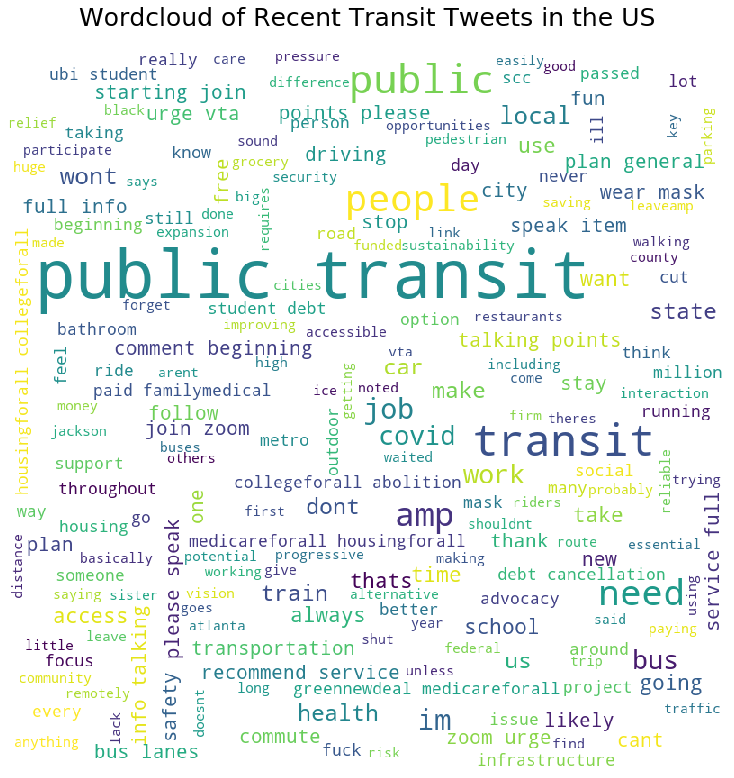

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Wordcloud of Recent Transit Tweets in the US', fontsize = 25, pad = 25)
plt.savefig('transit_wordcloud.png')
plt.show()